In [1]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


爬蟲

In [2]:
from bs4 import BeautifulSoup as bs
import json
import requests

In [3]:
def Data(a):
    response = requests.get("https://d.guduodata.com/m/show/detail/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data = json.loads(data_string)
    Type.append(data['type'])
    name.append(data['show_name'])
    date.append(data['release_date'])
    
    response = requests.get("https://d.guduodata.com/m/show/audience_analysis/id/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data1 = json.loads(data_string)
    male.append(data1['data']['sex']['baidu']['M'])
    female.append(data1['data']['sex']['baidu']['F'])
    age.append(data1['data']['age']['baidu']['first']['rank_desc'])
    age1.append(data1['data']['age']['baidu']['second']['rank_desc'])

    
    response = requests.get("https://d.guduodata.com/m/media/douban_basic/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data2 = json.loads(data_string)
    score.append(data2['score'])

裝進list

In [4]:
name = []
Type = []
date = []
male = []
female = []
age = []
age1 = []
score = []

b2019 = [24718,24697,24720,24688,24186,24535,24253,24299,24558,24524,24634,24612,24514,24689,24570,
         24642,24668,24520,21390,24038,23869,24554,23447,24362,23535,21600,23900,23416,24137,18909,
         24060,23338,24538,24326,23473,23831,24116,23426,12797,24215,24130,24600,23688]
for i in range(42):
    Data(b2019[i])

data2019
dataframe含'劇名''題材''日期''男(%)''女(%)''年齡第一多''年齡第二多''豆瓣評分'

In [5]:
import pandas as pd
data2019 = pd.DataFrame({'劇名':name,'題材':Type,'日期':date,'男(%)':male,
                         '女(%)':female,'年齡0':age,'年齡1':age1,'豆瓣評分':score})

In [6]:
data2019['男(%)'] = data2019['男(%)'].str.replace('%', '')
data2019['女(%)'] = data2019['女(%)'].str.replace('%', '')
data2019['年齡0'] = data2019['年齡0'].str.replace('岁', '')
data2019['年齡1'] = data2019['年齡1'].str.replace('岁', '')
data2019['題材'] = data2019['題材'].str.replace('/', '')

In [7]:
data2019

,劇名,題材,日期,男(%),女(%),年齡0,年齡1,豆瓣評分
0,卿卿日常,甜宠喜剧爱情古代,2022-11-10,42.35,57.65,19-24,25-34,7.1
1,点燃我，温暖你,现代IP改编都市情感青春,2022-11-03,42.45,57.55,19-24,25-34,7.5
2,天下长河,古代传奇历史,2022-11-11,44.53,55.47,19-24,25-34,8.3
3,不期而至,现代悬疑都市情感,2022-11-02,43.56,56.44,19-24,25-34,6.4
4,星汉灿烂 月升沧海,古偶爱情,2022-07-05,26.6,74.4,19-24,25-34,7.6
5,底线,现代职场主旋律都市,2022-09-19,46.27,53.73,19-24,25-34,7.3
6,沉香如屑 沉香重华,古偶玄幻IP改编,2022-07-20,41.46,58.54,19-24,25-34,5.9
7,苍兰诀,甜宠奇幻古代,2022-08-07,40.46,59.54,19-24,25-34,8.1
8,唐朝诡事录,悬疑推理古代,2022-09-27,46.36,53.64,19-24,25-34,7.9
9,请君,年代情感奇幻,2022-09-15,42.34,57.64,19-24,25-34,6.2


題材與性別

dataframe1
dataframe含'劇名''題材''日期''男(%)''女(%)'

In [8]:
dataframe1 = pd.DataFrame({'劇名':name,'題材':Type,'日期':date,'男(%)':male,'女(%)':female})

In [9]:
dataframe1['男(%)'] = dataframe1['男(%)'].str.replace('%', '')
dataframe1['女(%)'] = dataframe1['女(%)'].str.replace('%', '')
dataframe1['題材'] = dataframe1['題材'].str.replace('/', '')

In [10]:
dataframe1['題材'] = dataframe1['題材'].str.replace('.*女性.*', '女性', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*悬疑.*爱情.*', '悬疑爱情', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代.*悬疑.*', '悬疑', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*悬疑.*古代.*', '悬疑', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代.*爱情.*', '現代爱情', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*古偶.*', '古偶', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*古代.*爱情.*', '古偶', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*甜宠.*古代.*', '古偶', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*都市情感.*', '都市情感', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*都市爱情.*', '現代爱情', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代.*喜剧.*', '现代喜剧', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代.*涉案.*', '现代涉案', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*奇幻.*', '奇幻', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代.*职场.*', '现代职场', regex=True)
dataframe1['題材'][36] = '现代职场'
dataframe1['題材'][38] = '現代爱情'

In [11]:
dataframe1

,劇名,題材,日期,男(%),女(%)
0,卿卿日常,古偶,2022-11-10,42.35,57.65
1,点燃我，温暖你,都市情感,2022-11-03,42.45,57.55
2,天下长河,古代传奇历史,2022-11-11,44.53,55.47
3,不期而至,悬疑,2022-11-02,43.56,56.44
4,星汉灿烂 月升沧海,古偶,2022-07-05,26.6,74.4
5,底线,现代职场,2022-09-19,46.27,53.73
6,沉香如屑 沉香重华,古偶,2022-07-20,41.46,58.54
7,苍兰诀,古偶,2022-08-07,40.46,59.54
8,唐朝诡事录,悬疑,2022-09-27,46.36,53.64
9,请君,奇幻,2022-09-15,42.34,57.64


以題材做男女比例對照表格
data_grouped
dataframe含'題材''男(%)''女(%)'

In [12]:
dataframe1['男(%)'] = dataframe1['男(%)'].astype(float)
dataframe1['女(%)'] = dataframe1['女(%)'].astype(float)

In [13]:
data_grouped = dataframe1.groupby('題材')[['男(%)', '女(%)']].mean().reset_index()

In [14]:
data_grouped

,題材,男(%),女(%)
0,古代传奇历史,44.530000,55.470000
1,古偶,34.554000,65.646000
2,奇幻,47.396667,52.596667
3,女性,45.460000,54.540000
4,悬疑,44.262500,55.737500
5,悬疑探险IP改编,50.340000,50.660000
6,现代,39.560000,60.440000
7,现代喜剧,39.056667,60.976667
8,现代家庭IP改编,23.680000,76.320000
9,现代校园,53.620000,46.380000


以題材做男女比例對照長條圖

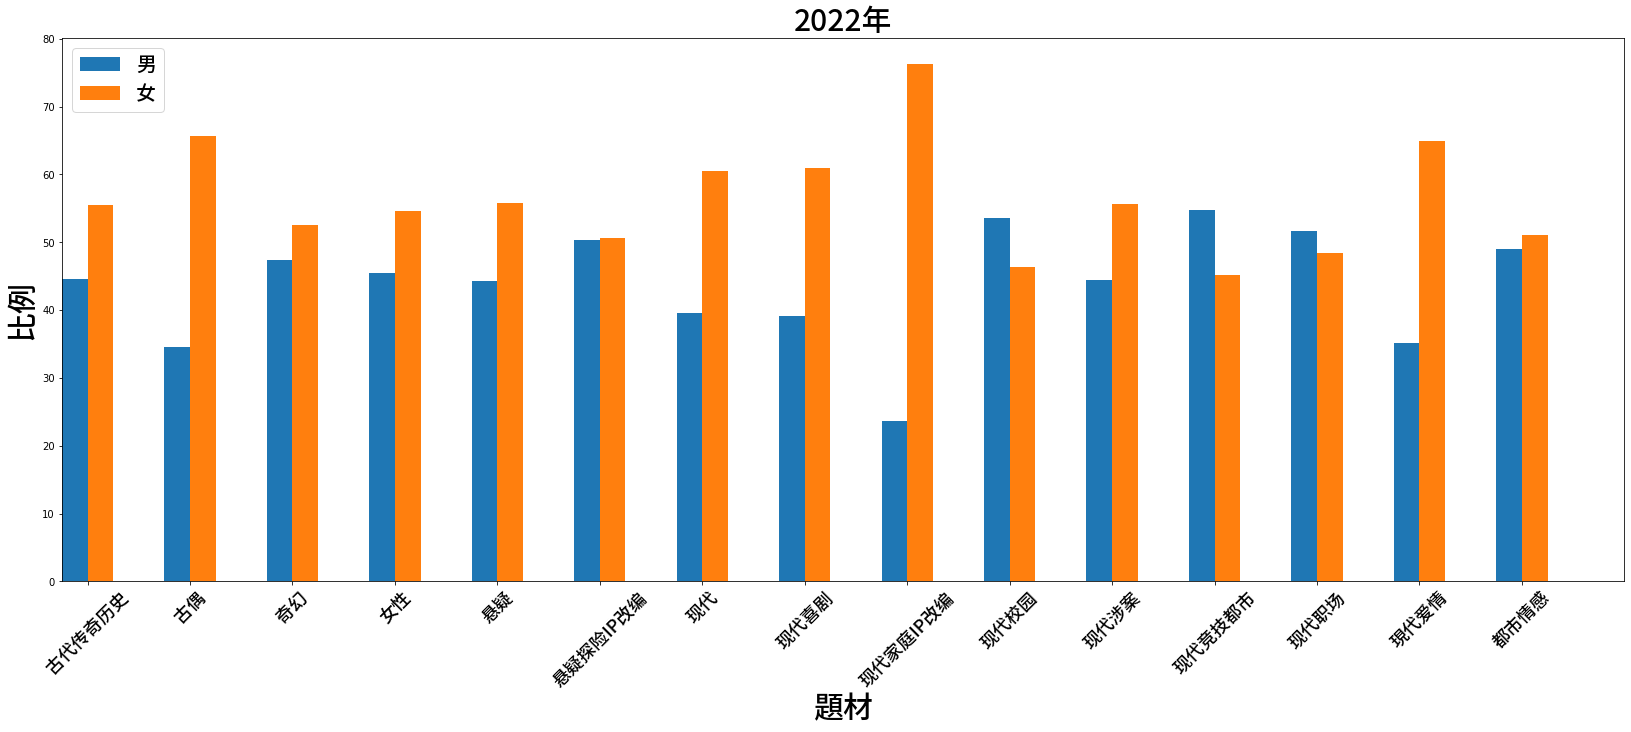

In [15]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font = FontProperties(fname=r'NotoSansTC-Medium.otf')
font1 = FontProperties(fname=r'NotoSansSC-Medium.otf')

plt.figure(figsize=(28, 10))

# 设置 x 轴类别和偏移量
x = data_grouped['題材']
bar_width = 0.25
index = range(len(x))
offset = bar_width / 2

# 绘制男生的条形图
plt.bar([i - offset for i in index], data_grouped['男(%)'], bar_width, label='男')
plt.xlim(-bar_width, len(x)) 
# 绘制女生的条形图
plt.bar([i + offset for i in index], data_grouped['女(%)'], bar_width, label='女')

plt.xticks(index, x, fontproperties=font1, fontsize=18, rotation=45)

plt.title('2022年', fontproperties=font, fontsize=30)
plt.xlabel('題材', fontproperties=font, fontsize=30)
plt.ylabel('比例', fontproperties=font, fontsize=30)
plt.legend(loc='upper left', prop=FontProperties(fname=r'NotoSansTC-Medium.otf', size=20))
plt.show()


題材與年齡

dataframe
dataframe含'劇名''題材''日期''集數''年齡第一多''年齡第二多'

In [16]:
dataframe = pd.DataFrame({'劇名':name,'題材':Type,'日期':date,'年齡0':age,'年齡1':age1})
dataframe['題材'] = dataframe['題材'].str.replace('/', '')
dataframe['年齡0'] = dataframe['年齡0'].str.replace('岁', '')
dataframe['年齡1'] = dataframe['年齡1'].str.replace('岁', '')

In [17]:
dataframe['題材'] = dataframe['題材'].str.replace('.*女性.*', '女性', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*悬疑.*爱情.*', '悬疑爱情', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*现代.*悬疑.*', '悬疑', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*悬疑.*古代.*', '悬疑', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*现代.*爱情.*', '現代爱情', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*古偶.*', '古偶', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*古代.*爱情.*', '古偶', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*甜宠.*古代.*', '古偶', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*都市情感.*', '都市情感', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*都市爱情.*', '現代爱情', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*现代.*喜剧.*', '现代喜剧', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*现代.*涉案.*', '现代涉案', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*奇幻.*', '奇幻', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*现代.*职场.*', '现代职场', regex=True)
dataframe['題材'][36] = '现代职场'
dataframe['題材'][38] = '現代爱情'

In [18]:
dataframe

,劇名,題材,日期,年齡0,年齡1
0,卿卿日常,古偶,2022-11-10,19-24,25-34
1,点燃我，温暖你,都市情感,2022-11-03,19-24,25-34
2,天下长河,古代传奇历史,2022-11-11,19-24,25-34
3,不期而至,悬疑,2022-11-02,19-24,25-34
4,星汉灿烂 月升沧海,古偶,2022-07-05,19-24,25-34
5,底线,现代职场,2022-09-19,19-24,25-34
6,沉香如屑 沉香重华,古偶,2022-07-20,19-24,25-34
7,苍兰诀,古偶,2022-08-07,19-24,25-34
8,唐朝诡事录,悬疑,2022-09-27,19-24,25-34
9,请君,年代情感奇幻,2022-09-15,19-24,25-34


In [19]:
# 计算不同年龄段的数量
count_grouped = dataframe.groupby(['題材', '年齡0']).size().unstack().reset_index()

# 补零处理
age_groups = ['19-24', '25-34']
for age_group in age_groups:
    if age_group not in count_grouped.columns:
        count_grouped[age_group] = 0
    count_grouped[age_group].fillna(0, inplace=True)

In [20]:
count_grouped['19-24'] = count_grouped['19-24'].astype(float)
count_grouped['25-34'] = count_grouped['25-34'].astype(float)
count_grouped['19-24'] = count_grouped['19-24'] +3
count_grouped['25-34'] = count_grouped['25-34'] +3

In [21]:
count_grouped

年齡0,題材,19-24,25-34
0,古代传奇历史,4.0,3.0
1,古偶,8.0,3.0
2,奇幻,4.0,3.0
3,女性,4.0,3.0
4,年代情感奇幻,4.0,3.0
5,悬疑,9.0,5.0
6,悬疑探险IP改编,4.0,3.0
7,现代,4.0,3.0
8,现代IP改编奇幻,4.0,3.0
9,现代喜剧,6.0,3.0


以題材做年齡(19-24/25-34)比例對照長條圖

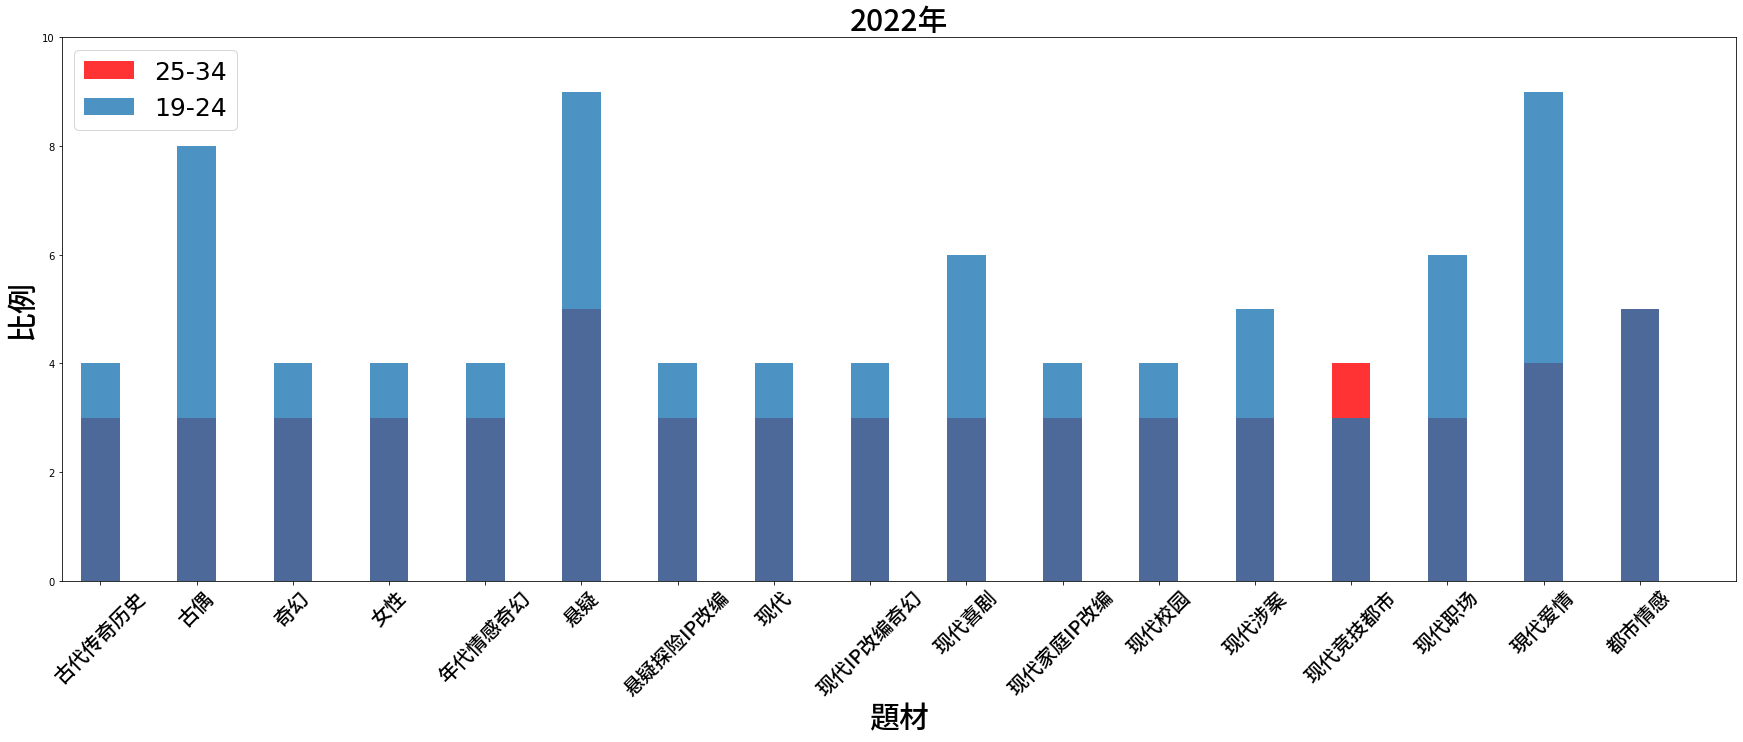

In [29]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font = FontProperties(fname=r'NotoSansTC-Medium.otf')
font1 = FontProperties(fname=r'NotoSansSC-Medium.otf')

plt.figure(figsize=(30, 10))

# 设置 x 轴类别
x = count_grouped['題材']

# 设置两个柱子的位置
bar_width = 0.4
index = range(len(x))

plt.bar(index, count_grouped['25-34'], bar_width, label='25-34',color='red',alpha = 0.8)
plt.bar(index, count_grouped['19-24'], bar_width, label='19-24',alpha = 0.8)

plt.xlim(-bar_width, len(x))  # 将x轴范围向左偏移一个柱子的宽度
plt.ylim(0,10) 
plt.xticks([i for i in index], x, fontproperties=font1, ha='center', fontsize=20, rotation=45)

plt.title('2022年', fontproperties=font, fontsize=30)
plt.xlabel('題材', fontproperties=font, fontsize=30)
plt.ylabel('比例', fontproperties=font, fontsize=30)
plt.legend(loc='upper left', prop={'size': 25})
plt.show()

題材與評分

In [23]:
def Data1(a):
    response = requests.get("https://d.guduodata.com/m/show/detail/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data4 = json.loads(data_string)
    Type1.append(data4['type'])
    Name.append(data4['show_name'])
    Date.append(data4['release_date'])
    
    response = requests.get("https://d.guduodata.com/m/media/douban_basic/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data3 = json.loads(data_string)
    Score.append(data3['score'])

In [34]:
Name = []
Type1 = []
Date = []
Score = []
a2019 = [24788,24718,24697,24878,24888,24845,24791,24889,24782,16404,24849,24720,24905,24814,24815,24688,24186,
         24535,24253,24622,24774,24299,24829,24704,24558,24892,24893,24524,24864,24634,24830,24837,24612,24514,
         24689,24570,24642,24810,24668,24602,24520,21390,24809,24859,24883,24904,24890,24742,24735,24792]

a2019_set = set(a2019)
b2019_set = set(b2019)
union_set = a2019_set.union(b2019_set)
union_list = list(union_set)

for i in range(74):
    Data1(union_list[i])

In [35]:
import pandas as pd
Data2019 = pd.DataFrame({'劇名':Name,'題材':Type1,'日期':Date,'豆瓣評分':Score})
Data2019['題材'] = Data2019['題材'].str.replace('/', '')
Data2019

,劇名,題材,日期,豆瓣評分
0,勇敢的翅膀,现代主旋律军旅,2022-12-13,0.0
1,胆小鬼,现代涉案悬疑IP改编,2022-08-08,7.7
2,月歌行,玄幻爱情古代,2022-12-15,5.8
3,我可能遇到了救星,现代甜宠都市爱情,2022-12-16,8.0
4,谢谢你医生,现代医疗IP改编情感,2022-11-04,6.3
...,...,...,...,...
69,人世间,年代都市情感,2022-01-28,8.4
70,炽道,现代甜宠爱情青春运动,2022-09-29,7.4
71,梦华录,古偶爱情古代,2022-06-02,8.0
72,女法医JD,现代涉案悬疑,2022-12-12,5.6


In [36]:
Data2019[:60]

,劇名,題材,日期,豆瓣評分
0,勇敢的翅膀,现代主旋律军旅,2022-12-13,0.0
1,胆小鬼,现代涉案悬疑IP改编,2022-08-08,7.7
2,月歌行,玄幻爱情古代,2022-12-15,5.8
3,我可能遇到了救星,现代甜宠都市爱情,2022-12-16,8.0
4,谢谢你医生,现代医疗IP改编情感,2022-11-04,6.3
5,亲爱的小孩,现代家庭IP改编,2022-04-10,7.7
6,摇滚狂花,现代情感女性,2022-10-11,7.4
7,我们这十年,现代主旋律,2022-10-10,0.0
8,护卫者,现代职场主旋律都市,2022-12-16,5.7
9,一不小心喵上你,现代都市情感,2022-12-20,0.0


In [38]:
Data2019[60:74]

,劇名,題材,日期,豆瓣評分
60,风犬少年的天空,现代校园,2020-09-24,8.0
61,警察荣誉,现代涉案涉案,2022-05-28,8.5
62,拜托了！8小时,现代都市爱情奇幻,2022-12-08,0.0
63,月里青山淡如画,现代都市爱情,2022-12-08,6.0
64,苍兰诀,甜宠奇幻古代,2022-08-07,8.1
65,三悦有了新工作,现代,2022-09-21,8.4
66,云中谁寄锦书来,古偶悬疑喜剧,2022-12-11,6.0
67,廉政狙击,现代反腐悬疑涉案,2022-12-10,6.2
68,唐朝诡事录,悬疑推理古代,2022-09-27,7.9
69,人世间,年代都市情感,2022-01-28,8.4


In [45]:
Data2019['題材'] = Data2019['題材'].str.replace('.*女性.*', '女性', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*悬疑.*爱情.*', '悬疑爱情', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*年代.*悬疑.*', '悬疑', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*悬疑.*', '悬疑', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*悬疑.*古代.*', '悬疑', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*爱情.*', '現代爱情', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*古偶.*', '古偶', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*古代.*爱情.*', '古偶', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*甜宠.*古代.*', '古偶', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*都市情感.*', '都市情感', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*都市爱情.*', '現代爱情', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*青春.*', '现代校園青春', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*校园.*', '现代校園青春', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*喜剧.*', '现代喜剧', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*涉案.*', '现代涉案', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*奇幻.*', '玄幻', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*玄幻.*', '玄幻', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*职场.*', '现代职场', regex=True)
Data2019['題材'][16] = '现代职场'
Data2019['題材'][38] = '現代爱情'
Data2019['豆瓣評分'][0] = 8.4
Data2019['豆瓣評分'][7] = 6.2
Data2019['豆瓣評分'][9] = 4.1
Data2019['豆瓣評分'][14] = 8.8
Data2019['豆瓣評分'][15] = 4.5
Data2019['豆瓣評分'][62] = 8.9
Data2019['豆瓣評分'][58] = 8.6
Data2019['豆瓣評分'][57] = 4.7
Data2019

C:\Users\User\AppData\Local\Temp\ipykernel_28044\2307616241.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2019['題材'][16] = '现代职场'
C:\Users\User\AppData\Local\Temp\ipykernel_28044\2307616241.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2019['題材'][38] = '現代爱情'
C:\Users\User\AppData\Local\Temp\ipykernel_28044\2307616241.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2019['豆瓣評分'][0] = 8.4
C:\Users\User\AppD

,劇名,題材,日期,豆瓣評分
0,勇敢的翅膀,现代主旋律军旅,2022-12-13,8.4
1,胆小鬼,悬疑,2022-08-08,7.7
2,月歌行,玄幻,2022-12-15,5.8
3,我可能遇到了救星,現代爱情,2022-12-16,8.0
4,谢谢你医生,现代医疗IP改编情感,2022-11-04,6.3
...,...,...,...,...
69,人世间,都市情感,2022-01-28,8.4
70,炽道,現代爱情,2022-09-29,7.4
71,梦华录,古偶,2022-06-02,8.0
72,女法医JD,悬疑,2022-12-12,5.6


In [46]:
Data2019['豆瓣評分'] = Data2019['豆瓣評分'].astype(float)
data_grouped2 = Data2019.groupby('題材')['豆瓣評分'].mean().reset_index()
data_grouped2

,題材,豆瓣評分
0,主旋律都市励志,8.800000
1,古代传奇历史,8.300000
2,古偶,7.328571
3,女性,5.550000
4,年代IP改编,8.200000
5,年代主旋律历史,6.300000
6,悬疑,7.025000
7,悬疑探险IP改编,6.900000
8,武侠古代,8.100000
9,爱情古代,6.700000


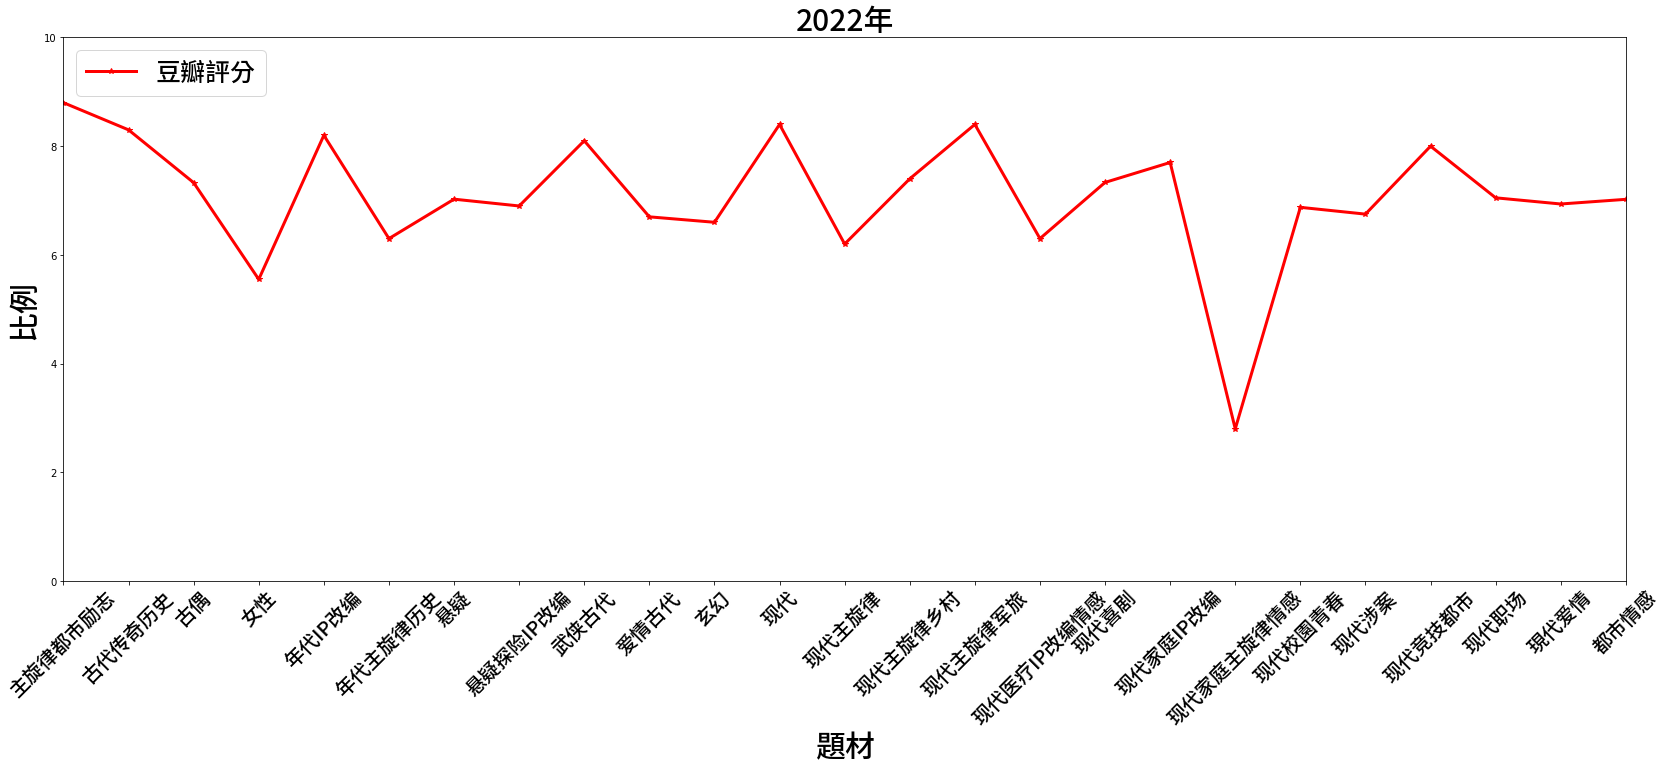

In [48]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font = FontProperties(fname=r'NotoSansTC-Medium.otf')
font1 = FontProperties(fname=r'NotoSansSC-Medium.otf')

plt.figure(figsize=(28, 10))

# 设置 x 轴类别
x = data_grouped2['題材']

index = range(len(x))

plt.plot(index, data_grouped2['豆瓣評分'], marker='*', c='r', label='豆瓣評分', linewidth=3)

plt.xlim(0, len(x) - 1)  # 調整x軸範圍，從最左側的數據點開始
plt.ylim(0, 10)
plt.xticks(index, x, fontproperties=font1, ha='center', fontsize=20, rotation=45)

plt.title('2022年', fontproperties=font, fontsize=30)
plt.xlabel('題材', fontproperties=font, fontsize=30)
plt.ylabel('比例', fontproperties=font, fontsize=30)
plt.legend(loc='upper left', prop=FontProperties(fname=r'NotoSansTC-Medium.otf', size=25), fontsize=50)
plt.show()
